In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount( '/content/drive', force_remount=True)

Mounted at /content/drive


# $ \color{blue}{ \textit{ Create Data: } } $

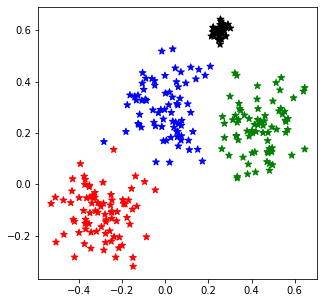

In [ ]:
import random

ys = [ -0.1, 0.2, 0.3, 0.6 ]
xs = [ -0.3, 0.45, 0, 0.25 ]
rs = [ 0.25, 0.25, 0.25, 0.05 ] 
ns = [ 80, 75, 75, 40 ]

cols = [ 'red', 'green', 'blue', 'black' ]

cx = []
cy = []
cc = []
ci = []
for n in range( len(ys) ):
    for _ in range( ns[n] ):
        cx.append( 0.4 * rs[n] * np.random.randn(1)[0] + xs[n] )
        cy.append( 0.4 * rs[n] * np.random.randn(1)[0] + ys[n] )
        cc.append( cols[n] )
        ci.append( n )



plt.figure( figsize=(5,5) ) 
plt.scatter( cx, cy, s=50, c=cc , marker = '*')
plt.show()

In [ ]:
cloud = []

for n in range( len(cx) ):
    cloud.append( [ cx[n], cy[n], ci[n]] )

In [ ]:
# np.save( '/content/drive/MyDrive/Classifier/cloud_data_1.npy', cloud )
# print( int(np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )[190,2]) )

# $ \color{blue}{ \textit{ Classify Data: } } $

## $ \color{blue}{ \textit{ Data visualisation: } } $

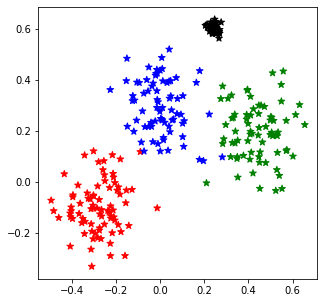

In [3]:
data = np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )

cols = [ 'red', 'green', 'blue', 'black' ]


X = [ x for x in data[:,0] ]
Y = [ y for y in data[:,1] ]
C = [ cols[int( n )] for n in data[:,2] ]


plt.figure( figsize = (5,5) )
plt.scatter( X, Y, c = C, s=50, marker = '*' )
plt.show()

## $ \color{blue}{ \textit{ Classification } } $

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


data = np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )
dataset = pd.DataFrame({'abscissa': data[:,0], 'ordinate': data[:,1], 'class': data[:,2].astype('int64') })


X = dataset.drop(['class'], axis=1)
y = dataset['class']


# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11) 


# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
choice = 'gini'  # 'entropy'

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print( 'Confusion matrix: \n\n', cm, '\n\n')

from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred_gini) )

Training-set accuracy score with criterion gini index: 0.9907
Model accuracy score with criterion gini index: 0.9630
Confusion matrix: 

 [[19  0  0  0]
 [ 0 15  0  0]
 [ 2  0 12  0]
 [ 0  0  0  6]] 


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00        15
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00         6

    accuracy                           0.96        54
   macro avg       0.98      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


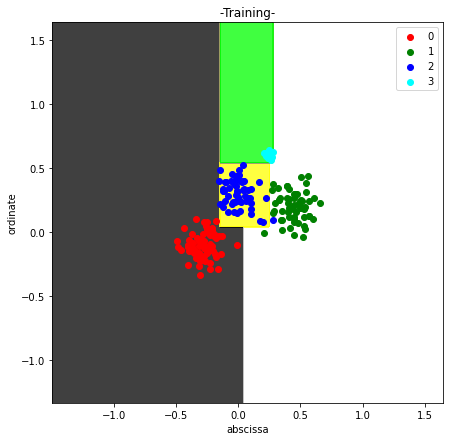

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


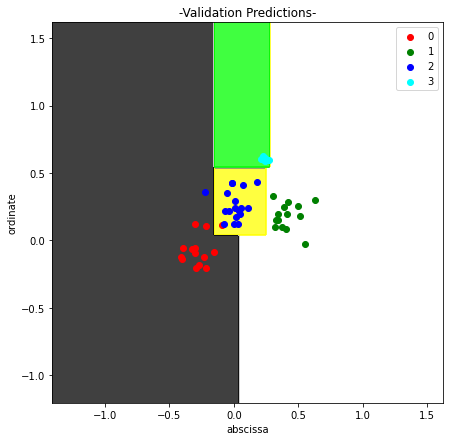

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



training_set, test_set = train_test_split( dataset, test_size=0.20, random_state=1)

X_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
X_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target


################################################################################
# Visualizing training:
################################################################################
# visualizing the training data after model fitting
plt.figure(figsize=(7,7))
x_set, y_set = X_train, y_train
x1,x2 = np.meshgrid( np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.01))

plt.contourf( x1, x2, clf_gini.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black','white', 'yellow', 'gray', 'lime')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red', 'green', 'blue', 'cyan'))(i),
                label = j)

plt.title(' -Training- ')
plt.xlabel('abscissa') 
plt.ylabel('ordinate')
plt.legend()
plt.show()


################################################################################
# Visualizing the predictions:
################################################################################
plt.figure(figsize=(7,7))
x_set,y_set = X_test, y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf( x1, x2, clf_gini.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black', 'white', 'yellow', 'gray', 'lime')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red', 'green', 'blue', 'cyan'))(i),
                label = j)

plt.title(' -Validation Predictions- ')
plt.xlabel('abscissa')
plt.ylabel('ordinate')
plt.legend()
plt.show()